# Introducción a los optimizadores

## Propòsito General

En el contexto del entrenamiento de redes neuronales el propósito general de los optimizadores es reducir la función de pérdida (descenso gradiente). **Los gradientes son los derivados parciales de la función de pérdida con respecto a cada peso en la red**. Un gradiente **indica la dirección y magnitud de cambio necesaria para minimizar la pérdida**. En otras palabras:

- Si un gradiente es positivo, el peso debe reducirse para disminuir la pérdida.
- Si el gradiente es negativo, el peso debe aumentarse.
Los gradientes son fundamentales en el Descenso de Gradiente, ya que nos dicen cómo ajustar cada peso para reducir la pérdida.

<div style="text-align: center;">
    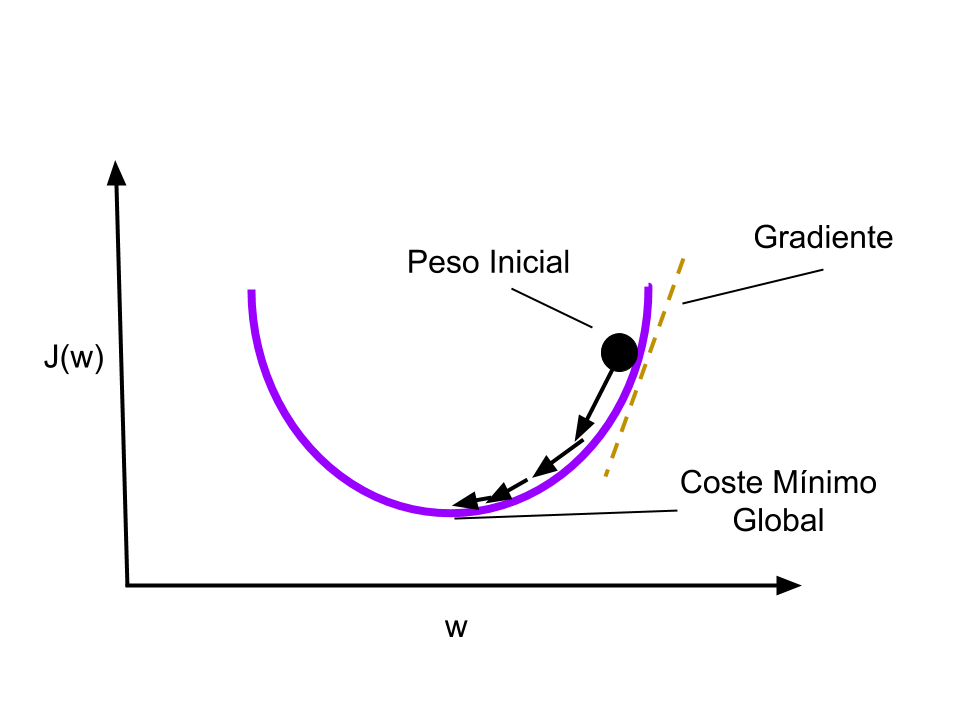
</div>


---

## Ejemplo Completo: Paso a Paso del Ajuste de Pesos con SGD

Supongamos que tenemos un modelo extremadamente simple con un solo peso, $ W $, y una sola entrada, $ X $, para ilustrar el proceso. Queremos que el modelo aprenda a predecir un valor objetivo $ Y_{\text{true}} $ ajustando el peso $ W $ para reducir la pérdida.

### Suposiciones Iniciales:
- **Entrada ($ X $)**: 2
- **Peso Inicial ($ W $)**: 0.5 (asignado aleatoriamente o con alguna estrategia de inicialización)
- **Etiqueta Verdadera ($ Y_{\text{true}} $)**: 5
- **Tasa de Aprendizaje ($ \eta $)**: 0.01
- **Función de Pérdida**: Error Cuadrático Medio (MSE)

---

### Paso 1: Calcular la Predicción Inicial

Dado el peso inicial $ W = 0.5 $ y la entrada $ X = 2 $:

$$
Y_{\text{pred}} = W \cdot X = 0.5 \cdot 2 = 1
$$

La **predicción inicial** del modelo es $ Y_{\text{pred}} = 1 $.

---

### Paso 2: Calcular la Función de Pérdida Inicial

La función de pérdida, usando el **Error Cuadrático Medio (MSE)**, se calcula como:

$$
\text{Pérdida} = (Y_{\text{true}} - Y_{\text{pred}})^2
$$

Sustituyendo los valores:

$$
\text{Pérdida} = (5 - 1)^2 = 16
$$

La **pérdida inicial** es 16, lo que indica un error significativo entre la predicción y el valor verdadero.

---

### Paso 3: Calcular el Gradiente de la Pérdida con Respecto a $ W $

Para ajustar $ W $, calculamos el **gradiente de la pérdida** con respecto a $ W $. Esto nos dice cómo cambiar $ W $ para reducir la pérdida.

La derivada de la pérdida con respecto a $ W $ es:

$$
\frac{d(\text{Pérdida})}{dW} = 2 \cdot (Y_{\text{true}} - Y_{\text{pred}}) \cdot (-X)
$$

Sustituyendo los valores actuales:

$$
\frac{d(\text{Pérdida})}{dW} = 2 \cdot (5 - 1) \cdot (-2) = 2 \cdot 4 \cdot (-2) = -16
$$

El **gradiente** resultante es **-16**.

---

### Paso 4: Ajuste del Peso $ W $ Usando el Gradiente y la Tasa de Aprendizaje

Con el gradiente calculado, el **Descenso de Gradiente Estocástico (SGD)** ajusta el peso $ W $ de la siguiente manera:

$$
W = W - \eta \cdot \text{gradiente}
$$

Sustituyendo:

$$
W = 0.5 - (0.01 \cdot -16)
$$
$$
W = 0.5 + 0.16 = 0.66
$$

El **peso $ W $ se ha actualizado** de 0.5 a 0.66.

---

### Paso 5: Recalcular la Predicción y la Pérdida con el Nuevo Peso

Con el nuevo valor de $ W = 0.66 $, recalculamos la predicción y la pérdida.

1. **Nueva Predicción**:
   $$
   Y_{\text{pred}} = W \cdot X = 0.66 \cdot 2 = 1.32
   $$

2. **Nueva Pérdida (MSE)**:
   $$
   \text{Pérdida} = (Y_{\text{true}} - Y_{\text{pred}})^2 = (5 - 1.32)^2
   $$
   $$
   = (3.68)^2 = 13.54
   $$

Después del primer paso, la pérdida ha disminuido de 16 a 13.54.

---

### Gráfico Textual del Proceso

Aquí tienes un diagrama textual para ilustrar el flujo de cada paso en el ajuste de los pesos con SGD:

```
                   INICIO
                     |
                     v
     ┌───────────────────────────────────────────────┐
     │ Paso 1: Calcular Predicción Inicial           │
     │   - Usar peso W inicial para predecir.       │
     │   - Y_pred = W * X                           │
     │   - Y_pred = 1                               │
     └───────────────────────────────────────────────┘
                     |
                     v
     ┌───────────────────────────────────────────────┐
     │ Paso 2: Calcular Pérdida Inicial              │
     │   - Usar MSE: (Y_true - Y_pred)^2             │
     │   - Pérdida = 16                              │
     └───────────────────────────────────────────────┘
                     |
                     v
     ┌───────────────────────────────────────────────┐
     │ Paso 3: Calcular Gradiente                    │
     │   - Derivar pérdida con respecto a W          │
     │   - Gradiente = -16                           │
     └───────────────────────────────────────────────┘
                     |
                     v
     ┌───────────────────────────────────────────────┐
     │ Paso 4: Ajustar Peso Usando Gradiente         │
     │   - W = W - (η * gradiente)                   │
     │   - Nuevo W = 0.66                            │
     └───────────────────────────────────────────────┘
                     |
                     v
     ┌───────────────────────────────────────────────┐
     │ Paso 5: Recalcular Predicción y Pérdida       │
     │   - Y_pred = W * X                            │
     │   - Nueva Pérdida ≈ 13.54                     │
     └───────────────────────────────────────────────┘
                     |
                     v
                  SIGUIENTE ÉPOCA
```

### Resumen

- Este proceso se repetirá en cada mini-lote de cada época, actualizando los pesos cada vez. Con cada ajuste, la pérdida debería reducirse progresivamente, y el modelo se acercará a una solución óptima. Cada iteración de este ciclo permite al modelo **aprender** y **mejorar** sus predicciones al actualizar continuamente los pesos en la dirección de menor pérdida. 

- Además en cada época siguiente, **los pesos comienzan en su último valor ajustado** y se optimizan nuevamente usando los datos


## Otros optimizadores

### Ejemplo Completo: Paso a Paso del Ajuste de Pesos con GD

```
                   INICIO DEL ENTRENAMIENTO
                             |
                             v
     ┌─────────────────────────────────────────────────────┐
     │ Paso 1: Calcular Predicciones                      │
     │   - Y_pred1 = W * X1                               │
     │   - Y_pred2 = W * X2                               │
     │   - Y_pred3 = W * X3                               │
     └─────────────────────────────────────────────────────┘
                             |
                             v
     ┌─────────────────────────────────────────────────────┐
     │ Paso 2: Calcular Pérdida Total (MSE)               │
     │   - Pérdida = promedio((Y_true - Y_pred)^2)        │
     │   - Pérdida inicial = 21.75                        │
     └─────────────────────────────────────────────────────┘
                             |
                             v
     ┌─────────────────────────────────────────────────────┐
     │ Paso 3: Calcular Gradiente con Respecto a W        │
     │   - Gradiente = suma((Y_pred - Y_true) * X)        │
     │   - Gradiente total = -29                          │
     └─────────────────────────────────────────────────────┘
                             |
                             v
     ┌─────────────────────────────────────────────────────┐
     │ Paso 4: Actualizar Peso Usando Gradiente           │
     │   - W = W - (η * gradiente)                        │
     │   - Nuevo W = 0.79                                 │
     └─────────────────────────────────────────────────────┘
                             |
                             v
               SIGUIENTE ÉPOCA Y REPETIR PROCESO

```

### Ejemplo Completo: Paso a Paso del Ajuste de Pesos con Adam

```
                   INICIO DEL ENTRENAMIENTO
                             |
                             v
     ┌──────────────────────────────────────────────────────┐
     │ Paso 1: Calcular Predicciones                       │
     │   - Y_pred1 = W * X1                                │
     │   - Y_pred2 = W * X2                                │
     │   - Y_pred3 = W * X3                                │
     └──────────────────────────────────────────────────────┘
                             |
                             v
     ┌──────────────────────────────────────────────────────┐
     │ Paso 2: Calcular Pérdida Total (MSE)                │
     │   - Pérdida = promedio((Y_true - Y_pred)^2)         │
     │   - Pérdida inicial = 21.75                         │
     └──────────────────────────────────────────────────────┘
                             |
                             v
     ┌──────────────────────────────────────────────────────┐
     │ Paso 3: Calcular Gradiente Total                    │
     │   - Gradiente = suma((Y_pred - Y_true) * X)         │
     │   - Gradiente total = -29                           │
     └──────────────────────────────────────────────────────┘
                             |
                             v
     ┌──────────────────────────────────────────────────────┐
     │ Paso 4: Actualizar Momentos (m y v)                 │
     │   - m = β1 * m + (1 - β1) * gradiente               │
     │   - v = β2 * v + (1 - β2) * (gradiente)^2           │
     └──────────────────────────────────────────────────────┘
                             |
                             v
     ┌──────────────────────────────────────────────────────┐
     │ Paso 5: Corrección de Bias                          │
     │   - m_hat y v_hat usando β1^t y β2^t                │
     └──────────────────────────────────────────────────────┘
                             |
                             v
     ┌──────────────────────────────────────────────────────┐
     │ Paso 6: Actualizar Peso W                           │
     │   - W = W - η * (m_hat / (sqrt(v_hat) + ε))         │
     │   - Nuevo W ≈ 0.51                                  │
     └──────────────────────────────────────────────────────┘
                             |
                             v
               SIGUIENTE ÉPOCA Y REPETIR PROCESO

```


<hr style="border: 10px solid black;">

# Introducción a las Funciones de Pérdida

**El propósito principal** de las Funciones de Pérdida en aprendizaje automático y redes neuronales **es medir el error o la discrepancia entre las predicciones del modelo y los valores reales**(también llamados etiquetas o valores objetivo). Esta medida del error proporciona una guía cuantitativa que el modelo utiliza para mejorar sus predicciones a lo largo del entrenamiento

## Clasificación de las funciones de pérdida

### Mean Squared Error (MSE)

El **Mean Squared Error (MSE)** es una métrica que calcula el **error cuadrático promedio** entre las predicciones y los valores reales. Es útil para evaluar qué tan lejos están en promedio las predicciones de los valores reales, penalizando los errores grandes al elevarlos al cuadrado. Esto ayuda a que el modelo ajuste sus pesos para minimizar grandes desviaciones.

La fórmula del MSE es:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - d_i)^2
$$

donde:
- $ y_i $ es el valor real.
- $ d_i $ es la predicción.
- $ n $ es el número total de muestras.

#### Ejemplo con MSE
Supongamos que estamos prediciendo el precio de casas en miles de dólares y tenemos los siguientes valores reales y predicciones:

- **Valores reales** (en miles de dólares): `[300, 450, 500]`
- **Predicciones** (en miles de dólares): `[310, 430, 520]`

Calculamos el MSE:

$$
\text{MSE} = \frac{1}{3} ((300 - 310)^2 + (450 - 430)^2 + (500 - 520)^2)
= \frac{1}{3} (100 + 400 + 400) = 300
$$

- Aquí, el mse es 300. Esto indica el error promedio en las predicciones; al ser un error cuadrático, **penaliza más los errores grandes (en este caso, las desviaciones de 20 y -20)**.
- El MSE es 300, lo cual indica el **error cuadrático medio en las predicciones**, pero este valor está en **unidades al cuadrado** (miles de dólares al cuadrado), lo que no es directamente interpretable en las unidades de los precios de las casas.

#### Root Mean Squared Error (RMSE)

El **Root Mean Squared Error (RMSE)** es simplemente la raíz cuadrada del MSE. Al tomar la raíz cuadrada, el RMSE nos da el error promedio en las mismas unidades que los valores reales, haciendo que la métrica sea más fácil de interpretar. Nos muestra **cuán lejos, en promedio, están las predicciones de los valores reales en las unidades originales**.

La fórmula del RMSE es:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$


##### Ejemplo con RMSE

Usando el MSE de 300 que calculamos anteriormente:

$$
\text{RMSE} = \sqrt{300} \approx 17.32
$$

Esto significa que, en promedio, nuestras predicciones están a **17.32 miles de dólares** (o 17,320 dólares) de los valores reales.

**¿Por Qué Usar Tanto MSE Como RMSE?**

1. **MSE**: Es útil como métrica de pérdida en los modelos porque penaliza los errores grandes, lo que ayuda al modelo a enfocarse en reducir los errores significativos durante el entrenamiento.
   - Proporciona un valor cuadrático que es estable para el cálculo y optimización.
   - Facilita la detección de grandes desviaciones, porque los errores se cuadran.

2. **RMSE**: Al tomar la raíz cuadrada del MSE, el RMSE convierte este valor en las mismas unidades que las predicciones y los valores reales, haciéndolo más **intuitivo y fácil de interpretar**.
   - Nos permite ver el error promedio en las mismas unidades que el objetivo (en este caso, miles de dólares), por lo que podemos determinar si el error es aceptable o no en el contexto del problema.

#### Resumen

- **MSE** mide el error cuadrático medio y es ideal para la optimización del modelo, ya que penaliza más los errores grandes.
- **RMSE** es la raíz cuadrada del MSE y proporciona el error promedio en las unidades originales, facilitando la interpretación del error.
- Ambos valores juntos ayudan a evaluar y mejorar el modelo, proporcionando tanto un valor optimizable (MSE) como una medida interpretable (RMSE) en el contexto del problema.
 
```shell
                 Error Cuadrático Medio (MSE)
                            │
                            │
                            │  
                            │  El MSE calcula el error cuadrático medio:
                            │  - Mide la diferencia promedio al cuadrado entre 
                            │    predicciones y valores reales.
                            │  - Penaliza más los errores grandes.
                            │  
                            │   Fórmula: MSE = (1/n) Σ (y_i - d_i)²
                            │  
                            │  
                            ▼
        ┌────────────────────────────────────────────┐
        │           Valor de MSE = 300               │
        └────────────────────────────────────────────┘
                            │
                            │
                            │  
                            ▼  Tomamos la raíz cuadrada del MSE
                           ┌────────────────────────┐
                           │   Raíz cuadrada de MSE │
                           │   (Convierte el error  │
                           │   a las unidades       │
                           │   originales)          │
                           └────────────────────────┘
                            │
                            ▼
                 ┌────────────────────────────────────────────┐
                 │   Root Mean Squared Error (RMSE)           │
                 │                                            │
                 │   Valor de RMSE = √300 ≈ 17.32             │
                 │   - Nos muestra el error promedio en       │
                 │     las mismas unidades que el objetivo    │
                 │   - Es más fácil de interpretar            │
                 └────────────────────────────────────────────┘


```



<hr style="border: 2px solid gray;">

### `binary_crossentropy` (Entropía Cruzada)

<div style="text-align: center;">
    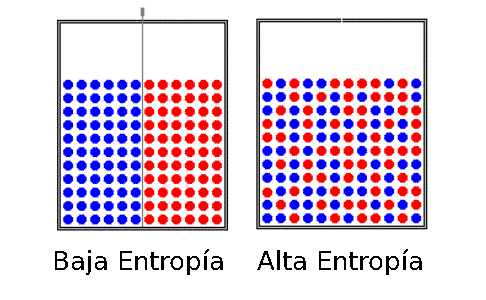
</div>
La función de pérdida `binary_crossentropy` se utiliza en **modelos de clasificación binaria**, donde la salida puede tener solo dos clases posibles, como "positivo/negativo" o "spam/no spam". Esta función mide la **diferencia entre las probabilidades predichas por el modelo** y los valores reales, penalizando los errores de predicción.

#### ¿Qué Significa `binary_crossentropy`?

- **Crossentropy** significa "entropía cruzada", y mide la **cantidad de error en las predicciones** comparando las probabilidades predichas con las probabilidades reales.
- En el caso binario, **`binary_crossentropy`** mide cuánto se desvían las predicciones de la etiqueta real (0 o 1) en términos de probabilidad:
  $$
  \text{binary\_crossentropy} = -[c \cdot \log(p) + (1 - c) \cdot \log(1 - p)]
  $$
  donde:
  - $ p $ es la probabilidad predicha de la clase positiva.
  - $ c $ es la etiqueta real (0 o 1).

La función de pérdida toma valores más altos cuando las predicciones están lejos de los valores reales (cuando el modelo predice incorrectamente).

#### ¿Cómo Afecta `binary_crossentropy` al Entrenar el Modelo?

Cuando se compila y entrena el modelo, `binary_crossentropy` afecta de la siguiente manera:

1. **Orientación en el Ajuste de Pesos**:
   - Durante el entrenamiento, el optimizador utiliza el valor de `binary_crossentropy` para **ajustar los pesos** de la red en cada iteración.
   - El objetivo es **minimizar la pérdida**, lo que significa que el modelo intenta que las predicciones de probabilidad sean lo más cercanas posible a las etiquetas reales.
   - Una predicción correcta con una probabilidad alta para la clase real tendrá una pérdida baja, mientras que una predicción incorrecta tendrá una pérdida alta. Esto guía al modelo para mejorar la precisión.

2. **Penalización de Errores Graves**:
   - `binary_crossentropy` penaliza más los errores de predicción graves. Por ejemplo, si el modelo predice una probabilidad de 0.1 para una clase que realmente es 1, la pérdida será mucho más alta que si predice 0.9. Esto anima al modelo a ser más seguro en sus predicciones.

3. **Convergencia del Modelo**:
   - Al minimizar `binary_crossentropy`, el modelo **converge** hacia un estado donde las predicciones para cada muestra se acercan cada vez más a las etiquetas reales (0 o 1). El modelo se entrena para **dar una alta probabilidad a la clase correcta** en cada predicción.

4. **Eficiencia en Clasificación Binaria**:
   - `binary_crossentropy` es ideal para problemas con dos clases, como **detectar si un correo es spam o no** o **diagnosticar una condición como positiva o negativa**. Al usar esta función de pérdida, el modelo optimiza sus predicciones en problemas binarios, mejorando su rendimiento en estas tareas.

#### Ejemplo de Interpretación en la Práctica (1)

Supongamos que estamos entrenando un modelo para clasificar imágenes de perros y gatos, donde:
- `1` representa **gato**.
- `0` representa **perro**.

**Explicación de Ejemplo** 
Si el modelo predice una probabilidad de 0.8 para una imagen de gato (valor real 1), la pérdida `binary_crossentropy` será baja, indicando que el modelo se está desempeñando bien. Pero si el modelo predice 0.2 para la misma imagen (cuando debería ser 1), la pérdida será alta, indicando que el modelo necesita ajustar sus pesos para mejorar la precisión en la próxima iteración.

En resumen, `binary_crossentropy` le da al modelo una **medida clara del error** para problemas binarios y guía el entrenamiento para que las predicciones de probabilidad se acerquen cada vez más a los valores reales, logrando así **mejores resultados en clasificación binaria**.

<hr style="border: 2px solid gray;">



### `categorical_crossentropy` - Entropía Cruzada Categórica

- **Descripción**: La **entropía cruzada categórica** se usa para problemas de **clasificación multiclase** (varias clases). Compara la probabilidad de las clases predichas con una **representación one-hot** de la clase verdadera. La pérdida será mínima cuando la predicción se acerque a la clase verdadera.
- **Fórmula**:  
  $$
  \text{categorical\_crossentropy} = -\sum_{j=1}^{N} y_j \cdot \log(c_j)
  $$
  donde:
  - $ y_j $ es el valor verdadero en formato one-hot (1 para la clase correcta y 0 para las demás).
  - $ c_j $ es la probabilidad predicha para cada clase $ j $.
  - $ N $ es el número de clases.

#### Ejemplo de Interpretación en la Práctica (1)
- **Ejemplo**: Supongamos que estamos clasificando imágenes de dígitos (0-9) y tenemos una imagen del número `3`. El modelo predice la probabilidad para cada clase (0-9) como:
  - Predicciones: `[0.01, 0.05, 0.02, 0.85, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01]`
  - Etiqueta real (en formato one-hot): `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`
  
  La `categorical_crossentropy` sería:
  $$
  \text{categorical\_crossentropy} = -[0 \cdot \log(0.01) + 0 \cdot \log(0.05) + 0 \cdot \log(0.02) + 1 \cdot \log(0.85) + \dots]
  = -\log(0.85) \approx 0.162
  $$
  Este valor es bajo, lo que indica que el modelo predice correctamente que la imagen es un `3`. Si la predicción de `3` fuera baja y alguna otra clase tuviera una probabilidad más alta, el valor de pérdida sería mayor, indicando una predicción incorrecta.

#### Ejemplo de Interpretación en la Práctica (2)
Si tienes una imagen que representa el dígito `3` y las salidas `softmax` de la red son:

```python
[0.01, 0.05, 0.02, 0.85, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01]
```

y la etiqueta verdadera en formato **one-hot** es `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`, entonces `categorical_crossentropy` **calculará una pérdida baja** porque el modelo está prediciendo correctamente con una alta probabilidad para el dígito `3`. Sin embargo, **si la salida estuviera más distribuida** (por ejemplo, `[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]`), **la pérdida sería mayor**, y el **optimizador ajustaría los pesos** en la dirección que favorezca una probabilidad más alta para la clase correcta.


#### Resumen

- **Categorical Crossentropy** es adecuada para **clasificación multiclase**, penalizando las predicciones que se alejan de la distribución one-hot de la clase verdadera.

Cada función de pérdida se adapta a diferentes tipos de problemas y ajusta el modelo para minimizar los errores en sus predicciones según el tipo de salida esperada.
